# Homework Set 1: Signals and Systems, Fourier Transforms

In [1]:
## MP 573 HW1
## Import some useful stuff
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal

# 1: Visualizing various signals

## A. Let's start by visualizing complex exponentials

Create a complex exponential signalwith frequencies $u_0 = 1/2$ and $v_0 = 1/5$ along x and y, respectively. Try displaying our signal f using the command  imshow. You should get an error - what is the problem?

Next, display the real part, imaginary part, magnitude, and phase of  f. Show or sketch these four images in your homework solutions (OK to show your completed jupyter notebook).

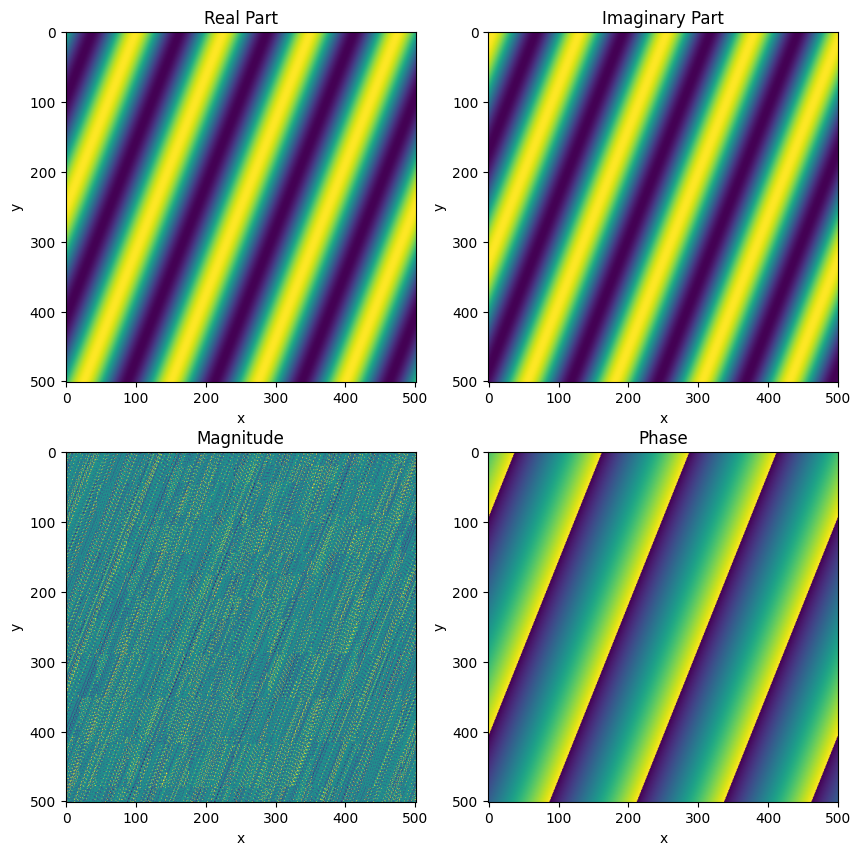

In [11]:
# Simulate 2D complex sinusoidal signal, and plot its real/imaginary values, and also magnitude/phase
N = 501
xmax = 4
x = np.linspace(-xmax,xmax,N)
y = x;
X, Y = np.meshgrid(x,y)
u0 = 1/2 # This is the frequency along x
v0 = 1/5 # This is the frequency along y
f = np.exp(1j*(2*np.pi*(u0*X + v0*Y)))



## To-Do: Display f directly (should probably give an error)
# plt.imshow(f)
# plt.show()
## To-Do: Display the real and imaginary parts, magnitude and phase of f
plt.figure(figsize=(10,10))
plt.subplot(2,2, 1)
plt.imshow(np.real(f))
plt.title('Real Part')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2,2, 2)
plt.imshow(np.imag(f))
plt.title('Imaginary Part')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2,2,3)
plt.imshow(np.abs(f))
plt.title('Magnitude')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2,2,4)
plt.imshow(np.angle(f))
plt.title('Phase')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## B. Add some initial phase $\pi/2$


Repeat part A, but this time with an initial phase $\theta = \pi /2$ (this is the phase at x=0 and y=0). How do the four displayed images (real part, imaginary part, magnitude, and phase) change with respect to part A, if at all?


In [ ]:
## To-Do: Add initial phase



## To-Do: Display the real and imaginary parts, magnitude and phase



## C. Try different frequencies
Repeat part A, but this time with frequencies  $u_0 = 1/4$ and $v_0 = 3$. How do the four displayed images (real part, imaginary part, magnitude, and phase) change with respect to part A, if at all?

In [ ]:
## To-Do: Simulate 2D complex sinusoidal  f



## To-Do: Display the real and imaginary parts, magnitude and phase of f


# 2. Support of convolution

## 2.2 Practice

### A.
Verify your result by calculating numerically (eg: in Matlab) the convolution of the following signals: $f_1(x) =\hbox{rect}(x/2)$ and $f_2(x) =\hbox{rect}(2x)$. Note that in most computational environments there is no exact notion of a signal $f(x)$, only data arrays. However, you can define an array of x values (x = np.linspace(-5,5,1001)), and then define a discretized rect signal relative to your x values (f1 = 1.0*(np.abs(x)<1), and analogously for $f_2(x)$). Then you can convolve the two arrays to obtain an array $g$, but make sure to keep track of the dimensions of the result and the meaning of these dimensions (eg: consider using the command "convolve" with an optional parameter " mode='same' ".  Plot the result on the appropriate x-scale and include the plot in your homework solutions.


In [ ]:
## Simulate 1D input signal f1(x) and f2(x)
N = 1001
xmax = 5
x = np.linspace(-xmax,xmax,N)
dx = x[1]-x[0]
f1 = 1.0*(np.abs(x)<1)
f2 = 1.0*(np.abs(x)<1/4)

## To-Do: calculate the convolution between f1 and f2

# To-Do: Plot the two signals f1 and f2, and their convolution g


### B.
Does the support (size of the non-zero region) in your computational result $g$ match your analytical prediction from the previous question (note that these should match, at least up to the discretization level on your arrays)? Does the height of your computational result $g$ (ie: the actual values of $g$) match your analytical prediction (note that this will generally not happen unless you've taken steps to make them match)?  

### C.
Note that the (discrete) convolution implemented in a package such as Python/scipy is actually a summation rather than an integral:

$g[n] = \sum_m f_1[m] f_2[n-m]$

Repeat the operation above (create f1 and f2, and convolve them to obtain g), but this time based on a finer grid of size $4001$ (x = np.linspace(-5,5,4001)) and then based on an even finer grid of size $8001$ (x = np.linspace(-5,5,8001)). Does the height of your convolution result depend on the resolution of your grid? How would you normalize your  calculation so that the height of the resulting convolution height does not depend on the resolution of the grid, and matches the analytical calculation? (Think about approximating the convolution integral defined in class using a summation).

In [ ]:
## To-do: Simulate 1D input signal f1(x) and f2(x)
N = 1001
xmax = 5
x = np.linspace(-xmax,xmax,N)
Delta_x = x[1]-x[0]
f1 = 1.0*(np.abs(x)<1)
f2 = 1.0*(np.abs(x)<1/4)

## To-Do: calculate the convolution between f1 and f2
g = Delta_x*signal.convolve(f1, f2, mode='same') # Include dx factor to normalize the sum (approximate the integral)

# To-Do: Plot the two signals f1 and f2, and their convolution g


# 3 Separable convolution

## 3.3 Practice

Use Python (or some other computational tool) to generate a 2D rect function (as defined above) over an (x,y) grid with range (-3,3) along each dimension.

Next, calculate the convolution of rect(x,y) with itself, both as a 2D convolution (Python: use the command signal.convolve2d), as well as a product of two 1D convolutions (Python: signal.convolve, which you can apply separately to $f_1$ and $f_2$). Make sure you understand the  optional parameters and outputs of these commands as they handle finite arrays rather than signals on a continuous domain. For instance, consider using a third parameter mode='same' (including the single quotes) when calling the convolve or convolve2d function. Also, note that you cannot just feed 2D arrays to the 1D convolution function convolve and expect that it will know the dimension along which you want to convolve.

Show that either approach (single 2D convolution, or product of two 1D convolutions) leads to the same resulting 2D signal. You can show this by calculating the relative difference between the two resulting signals (2D arrays), which we can name g1 and g2. You can calculate this relative difference as RelDiff = norm(g1(:)-g2(:))/norm(g1(:)), which should be a very small number, possibly not exactly zero due to numerical precision limitations.

Does your empirically calculated convolution have the same shape as the analytically calculated convolution from the previous question? You can assess this by plotting a profile (say, a horizontal profile through the center of your array, ie: for y=0) and comparing to your resulting expression from the previous question.

In [ ]:
# Simulate 2D rect signal
N = 101
xmax = 3
x = np.linspace(-xmax,xmax,N)
y = x;
f1 = 1.0*(np.abs(x)<0.5)
f2 = 1.0*(np.abs(y)<0.5)
# Make sure to understand how fx and fy are created,
# including the logical operators ``abs(x)<0.5'' and ``abs(y)<0.5''
f = np.outer(f1,f2)
# Make sure to understand the previus line,
# including the outer product of two vectors


# To-Do: 2D convolution

# To-Do: 1D convolutions, then combine

# To-Do: Calculate the difference between g1 and g2



